Steve Johnson, Data Science Project

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import json

import seaborn as sns

Below is a CSV file that was created from the most recent census data for Portland, Oregon.
Data on average commute time per zip code was combined with data on average income by zip code.
Each file was aligned by zip code order before combing and other unused data columns were deleted.

The question of interest is whether commute time was significantly correlated to income.


In [2]:
pd.read_csv('Commute.csv')

,ZIP,Pop,Income,Commute
0,97201,"24,960",24050.28,19.1
1,97202,"37,411",18548.37,23.2
2,97203,"27,689",13307.92,25.4
3,97204,"1,319",9343.75,23.6
4,97205,"6,212",14643.55,21.7
5,97206,"45,132",15277.11,26.0
6,97209,"8,107",16935.11,21.7
7,97210,"10,219",25152.35,19.9
8,97211,"31,021",15852.34,22.9
9,97212,"23,187",22939.74,21.0


The file was loaded in a pandas data frame and the shape was checked to be sure it was as expected.

In [3]:
commute = pd.read_csv('Commute.csv')

In [4]:
commute.shape

(32, 4)

 Below a simple scatter plaot was made as a preliminary review.

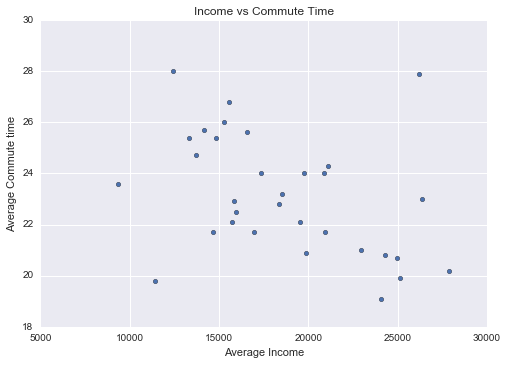

In [5]:
commute = pd.read_csv('Commute.csv')
commute.plot('Income', 'Commute', 'scatter')
plt.xlabel('Average Income')
plt.ylabel('Average Commute time')
plt.title('Income vs Commute Time')
#xlim = plt.xlim(5000,30000)
#ylim = plt.ylim(18, 30)

A least squares regression analysis was conducted and the results are diaplayed below.
It is important to notice the low R-squared value of 0.154.

In [6]:
model = sm.OLS(commute.Commute, sm.add_constant(commute.Income))

In [7]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Commute   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     5.442
Date:                Mon, 12 Dec 2016   Prob (F-statistic):             0.0266
Time:                        21:24:03   Log-Likelihood:                -69.784
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      30   BIC:                             146.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         26.7475      1.582     16.909      0.0

The fitted line was then plotted against the data as seen below.

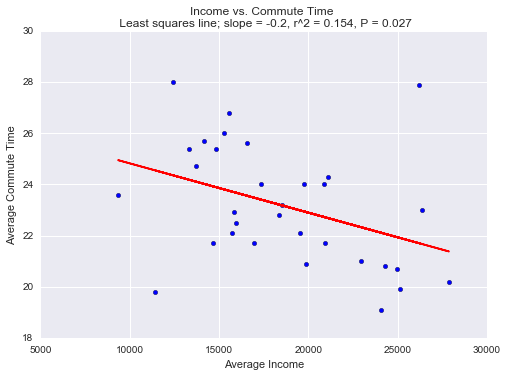

In [8]:
fig = plt.figure()
c = fig.add_subplot(111)
c.scatter(commute.Income, commute.Commute)
c.plot(commute.Income, results.fittedvalues, 'r')
c.set_xlabel('Average Income')
c.set_ylabel('Average Commute Time')
c.set_title('Income vs. Commute Time \n Least squares line; slope = -0.2, r^2 = 0.154, P = 0.027')

The analysis of this data supports a conclusion that there is NOT a strong correlation between 
average commute time and average income. This could be for a number of reasons.
Most significant is that the data given were averages of rather large geographical regions 
(zip codes).
This lead to a flattening of the data with a loss of necessary detail.

In an effort to find a better fit a logarithmic curve was plotted.
It was nearly the same as the flat fitted line as seen below.

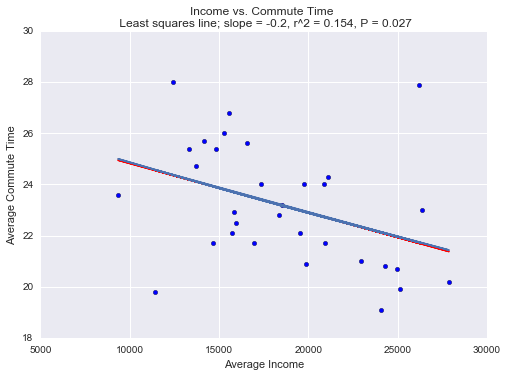

In [9]:
from scipy.optimize import curve_fit

fig = plt.figure()
c = fig.add_subplot(111)
c.scatter(commute.Income, commute.Commute)
c.plot(commute.Income, results.fittedvalues, 'r')
c.set_xlabel('Average Income')
c.set_ylabel('Average Commute Time')
c.set_title('Income vs. Commute Time \n Least squares line; slope = -0.2, r^2 = 0.154, P = 0.027')

def myfitfunc(xvals, amp, scale):
   return amp * np.exp(scale*xvals)
   

fit_params = curve_fit(myfitfunc, commute.Income/1000, commute.Commute)
plt.plot(commute.Income, myfitfunc(commute.Income/1000, *fit_params[0]))

In [10]:
fit_params

(array([  2.70134575e+01,  -8.30813926e-03]),
 array([[  3.33865301e+00,  -6.37292907e-03],
        [ -6.37292907e-03,   1.29720520e-05]]))

In a further effort to find a better fit a parabolic curve was plotted.
It was perhaps an effort in futiliy as the data available is not detailed enough to answer the question asked.

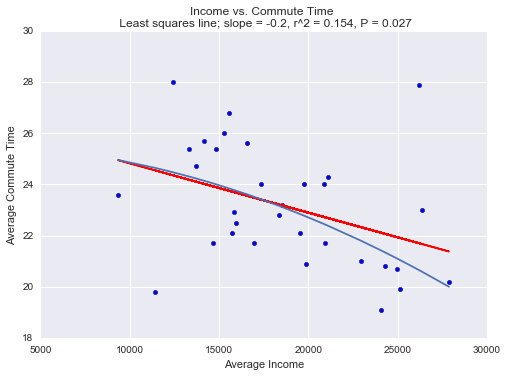

In [11]:
from scipy.optimize import curve_fit

fig = plt.figure()
c = fig.add_subplot(111)
c.scatter(commute.Income, commute.Commute)
c.plot(commute.Income, results.fittedvalues, 'r')
c.set_xlabel('Average Income')
c.set_ylabel('Average Commute Time')
c.set_title('Income vs. Commute Time \n Least squares line; slope = -0.2, r^2 = 0.154, P = 0.027')

def myfitfunc(xvals, slope, intercept):
   return slope*xvals**2 + intercept

sorted_income = commute.Income.sort_values(inplace=False)
commute_nooutlier = commute[~((commute.Income > 25000) & (commute.Commute > 26))]

fit_params = curve_fit(myfitfunc, commute_nooutlier.Income/1000, commute_nooutlier.Commute)
plt.plot(sorted_income, myfitfunc(sorted_income/1000, *fit_params[0]))

If data could be found on individual income vs. individual commute time it may prove more 
interesting to analyze for a significant correlation between them.

Steve Johnson, Data Science Project